In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
nycd = pd.DataFrame.from_csv(open('Data/New_York_City_Leading_Causes_of_Death.csv', 'r'))

In [4]:
nycd.head()

,Ethnicity,Sex,Cause of Death,Count,Percent
Year,,,,,
2010-01-01,NON-HISPANIC BLACK,MALE,HUMAN IMMUNODEFICIENCY VIRUS DISEASE,297,5
2010-01-01,NON-HISPANIC BLACK,MALE,INFLUENZA AND PNEUMONIA,201,3
2010-01-01,NON-HISPANIC BLACK,MALE,INTENTIONAL SELF-HARM (SUICIDE),64,1
2010-01-01,NON-HISPANIC BLACK,MALE,MALIGNANT NEOPLASMS,1540,23
2010-01-01,NON-HISPANIC BLACK,MALE,MENTAL DISORDERS DUE TO USE OF ALCOHOL,50,1


In [10]:
nycd.columns

Index([u'Ethnicity', u'Sex', u'Cause of Death', u'Count', u'Percent'], dtype='object')

In [9]:
nycd.index

DatetimeIndex(['2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01', 
               ...
               '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01'],
              dtype='datetime64[ns]', name=u'Year', length=2880, freq=None, tz=None)

In [41]:
nycd.dtypes

Ethnicity         object
Sex               object
Cause of Death    object
Count              int64
Percent            int64
dtype: object

In [7]:
nycd.pivot_table(values='Count', index='Ethnicity', columns = 'Sex', aggfunc = sum)

Sex,FEMALE,MALE
Ethnicity,,
ASIAN & PACIFIC ISLANDER,18381,23088
HISPANIC,57846,65190
NON-HISPANIC BLACK,97818,89613
NON-HISPANIC WHITE,188973,173952


In [5]:
nycd.sort('Count', ascending = False, inplace = True)
nycd.drop_duplicates(inplace = True)
nycd.head()

,Ethnicity,Sex,Cause of Death,Count,Percent
Year,,,,,
2007-01-01,NON-HISPANIC WHITE,FEMALE,DISEASES OF HEART,7050,49
2008-01-01,NON-HISPANIC WHITE,FEMALE,DISEASES OF HEART,6836,48
2009-01-01,NON-HISPANIC WHITE,FEMALE,DISEASES OF HEART,6297,46
2007-01-01,NON-HISPANIC WHITE,MALE,DISEASES OF HEART,5632,43
2008-01-01,NON-HISPANIC WHITE,MALE,DISEASES OF HEART,5503,43


In [10]:
nycd.describe()

,Count,Percent
count,901.000000,901.000000
mean,261.881243,3.907880
std,744.058382,8.348743
min,5.000000,0.000000
25%,22.000000,0.000000
50%,58.000000,1.000000
75%,168.000000,3.000000
max,7050.000000,49.000000


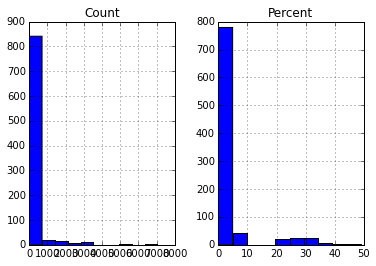

In [11]:
nycd.hist()
plt.show()

In [16]:
DeathItems = nycd['Cause of Death'].value_counts()
DeathItems[:10]
#Yes, I know these are just the numeber of cells.
# Sex*2, Ethnicity*4, Year*5 = 40 cells/Cause of Death

CEREBROVASCULAR DISEASE                        40
MALIGNANT NEOPLASMS                            40
INFLUENZA AND PNEUMONIA                        40
ESSENTIAL HYPERTENSION AND RENAL DISEASES      40
DISEASES OF HEART                              40
DIABETES MELLITUS                              39
NEPHRITIS, NEPHROTIC SYNDROME AND NEPHROSIS    38
CONGENITAL MALFORMATIONS,DEFORMATIONS          37
VIRAL HEPATITIS                                37
CHRONIC LOWER RESPIRATORY DISEASES             37
dtype: int64

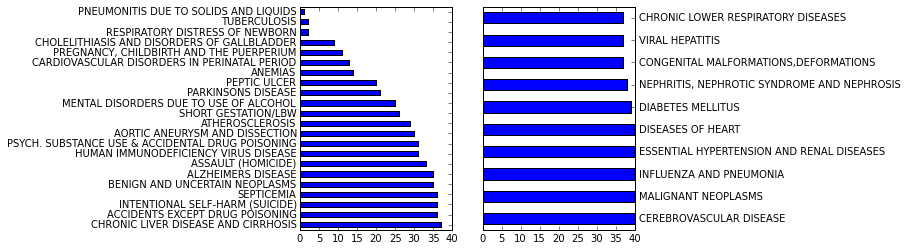

In [26]:
plt.subplot(1,2,1)
DeathItems[10:].plot(kind = 'barh')
plt.subplot(1,2,2)
DeathItems[:10].plot( kind = 'barh').yaxis.tick_right()

In [27]:
#.group_by([''])
#.size().unstack().fillna(0)


In [ ]:
nycdsb = nycd
for x in nycdsb:
    if nycd.loc[x, 'Year'] == '2007-01-01' and nycd.loc[x, 'Ethnicity'] == 'NON-HISPANIC WHITE'
        and nycd.loc[x, 'Sex'] == 'FEMALE':
        put it in a?
    else:
        delete
#The basic, uncivilized way of expressing what I want        

In [6]:
year = '20070101'
nycdyr = nycd.loc[year:year, ]
nycdyr.tail()
#Remember: Numbers placed in loc are treated as labels, not index. Use iloc for index.


,Ethnicity,Sex,Cause of Death,Count,Percent
Year,,,,,
2007-01-01,ASIAN & PACIFIC ISLANDER,FEMALE,PARKINSONS DISEASE,5,0
2007-01-01,ASIAN & PACIFIC ISLANDER,FEMALE,ATHEROSCLEROSIS,5,0
2007-01-01,ASIAN & PACIFIC ISLANDER,MALE,AORTIC ANEURYSM AND DISSECTION,5,0
2007-01-01,ASIAN & PACIFIC ISLANDER,MALE,CARDIOVASCULAR DISORDERS IN PERINATAL PERIOD,5,0
2007-01-01,ASIAN & PACIFIC ISLANDER,MALE,PEPTIC ULCER,5,0


In [7]:
nycdyr = nycdyr[nycdyr['Percent'] > 0]
nycdyr = nycdyr[nycdyr['Sex'].isin(['FEMALE'])]
nycdyr = nycdyr[nycdyr['Ethnicity'].isin(['NON-HISPANIC WHITE'])]
nycdyr = nycdyr[['Cause of Death','Count','Percent']]
nycdyr.tail()
#
#Alternative sorting phrase (also works):
#nycdyr = nycdyr[nycdyr[''] == '']
#
#End result is Female Whites (non-Hispanic)

,Cause of Death,Count,Percent
Year,,,
2007-01-01,ESSENTIAL HYPERTENSION AND RENAL DISEASES,155,1
2007-01-01,ALZHEIMERS DISEASE,107,1
2007-01-01,"NEPHRITIS, NEPHROTIC SYNDROME AND NEPHROSIS",89,1
2007-01-01,PSYCH. SUBSTANCE USE & ACCIDENTAL DRUG POISONING,85,1
2007-01-01,SEPTICEMIA,79,1


In [33]:
print sum(nycdyr['Percent'])
print len(nycdyr.index)

92
12


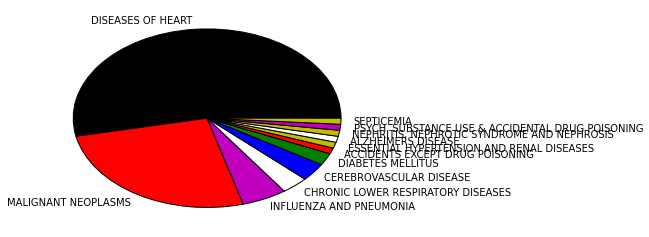

In [24]:
#Pie Chart
import random

labels = nycdyr['Cause of Death']
sizes = nycdyr['Percent']
colorset = 'rgbmcyw'
color = ['k']
explode = 0

#Ensures colors next to each other don't match
for x in xrange(len(nycdyr)):
    hold = random.choice(colorset)
    while color[x] == hold:
        hold = random.choice(colorset)
    color.append(hold)


plt.pie(sizes, labels = labels,
        colors = color)
plt.show()
#plt.axis('equal')
#autopct = '%1.1f%%', shadow = True, startangle = 0
#['red','yellow','green','blue','orange','purple']

In [39]:
nycdgp = nycd.groupby(lambda x: x.year)
nycdgp.aggregate(np.sum)
#Percents: Sex*2, Ethnicity*4; Year*5

,Count,Percent
2007,48963,715
2008,48277,701
2009,46977,708
2010,46348,711
2011,45390,686


In [10]:
subgroup2007 = nycdgp.get_group(2007)

In [31]:
x = 'Ethnicity'
nycdap = nycd.groupby(x)
nycdap.apply(lambda s: len(s[x].unique()))

Ethnicity
ASIAN & PACIFIC ISLANDER    1
HISPANIC                    1
NON-HISPANIC BLACK          1
NON-HISPANIC WHITE          1
dtype: int64

In [30]:
x = ['Percent', 'Cause of Death']
nycdap = nycd.groupby(x)
nycdap.apply(lambda s: len(s['Cause of Death'].unique()))

Percent  Cause of Death                                  
0        ALZHEIMERS DISEASE                                  1
         ANEMIAS                                             1
         AORTIC ANEURYSM AND DISSECTION                      1
         ASSAULT (HOMICIDE)                                  1
         ATHEROSCLEROSIS                                     1
         BENIGN AND UNCERTAIN NEOPLASMS                      1
         CARDIOVASCULAR DISORDERS IN PERINATAL PERIOD        1
         CHOLELITHIASIS AND DISORDERS OF GALLBLADDER         1
         CHRONIC LIVER DISEASE AND CIRRHOSIS                 1
         CONGENITAL MALFORMATIONS,DEFORMATIONS               1
         HUMAN IMMUNODEFICIENCY VIRUS DISEASE                1
         INTENTIONAL SELF-HARM (SUICIDE)                     1
         MENTAL DISORDERS DUE TO USE OF ALCOHOL              1
         NEPHRITIS, NEPHROTIC SYNDROME AND NEPHROSIS         1
         PARKINSONS DISEASE                                 